# Learning Keras: Binary Classification & Simple Neural Net

This notebook demonstrates:
1. A single-layer “logistic regression” model on a non-linear 2D dataset.
2. A single-layer “logistic regression” model on a 3D non-separable dataset, with a plotted decision plane.
3. A small multi-layer perceptron (MLP) on the 2D “moons” dataset, with decision-boundary visualization.

We use TensorFlow/Keras, scikit-learn, NumPy & Matplotlib.

## 1. Setup & Imports


In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn for data and preprocessing
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import BinaryCrossentropy

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D


## 2. 2D Non-Linear “Moons” Dataset + Logistic Regression


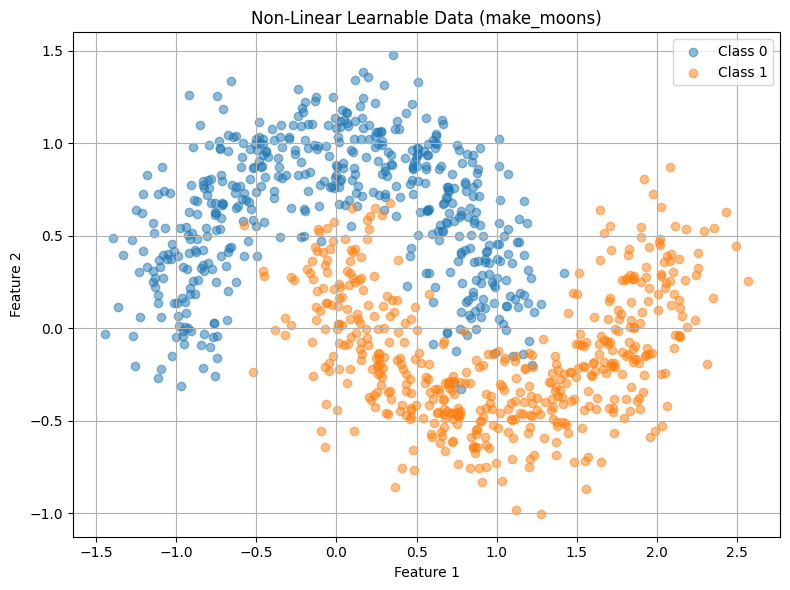

Epoch 1/100


c:\Users\Equipo\Documents\CSIC\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2663 - loss: 1.0292 - val_accuracy: 0.6150 - val_loss: 0.5964
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 0.5137 - val_accuracy: 0.7950 - val_loss: 0.4333
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8476 - loss: 0.3856 - val_accuracy: 0.8100 - val_loss: 0.3757
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.3451 - val_accuracy: 0.8200 - val_loss: 0.3475
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8561 - loss: 0.3264 - val_accuracy: 0.8250 - val_loss: 0.3308
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8547 - loss: 0.3311 - val_accuracy: 0.8450 - val_loss: 0.3198
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8709 - loss: 0.3122 - val_accuracy: 0.8450 - val_loss: 0.3124
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8705 - loss: 0.3103 - val_accuracy: 0.8500 - val_loss: 0.3

In [3]:
# 2.1 Generate data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# 2.2 Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.5)
plt.title("Non-Linear Learnable Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2.3 Split & Scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 2.4 Build & Train Single-Layer Model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))
])
model.compile(
    optimizer=SGD(learning_rate=0.1),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)


It happens to converge very fast and can only reach a validation accuracy of 0.86 with the linear decision boundary.

## 3. Logistic Regression in 3D


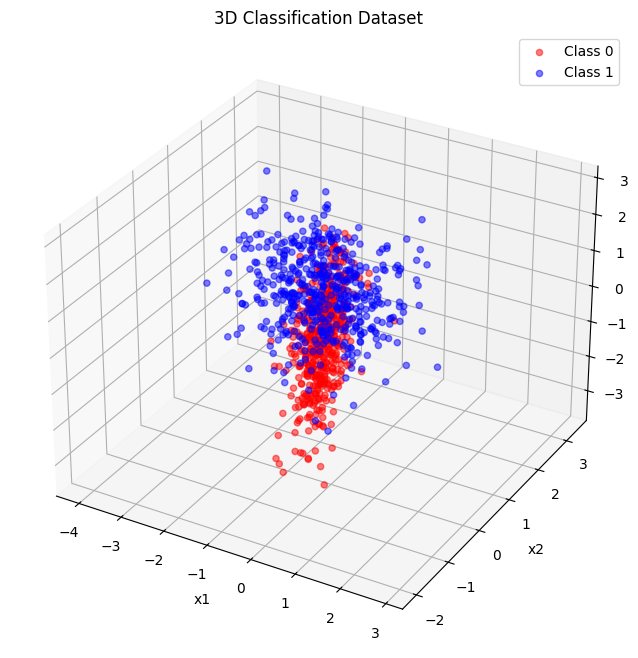

Epoch 1/100


c:\Users\Equipo\Documents\CSIC\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4725 - loss: 0.8015 - val_accuracy: 0.6650 - val_loss: 0.6048
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7943 - loss: 0.5359 - val_accuracy: 0.8450 - val_loss: 0.4720
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8809 - loss: 0.4385 - val_accuracy: 0.8550 - val_loss: 0.4169
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8857 - loss: 0.4065 - val_accuracy: 0.8600 - val_loss: 0.3889
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8829 - loss: 0.3978 - val_accuracy: 0.8500 - val_loss: 0.3722
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8768 - loss: 0.3699 - val_accuracy: 0.8500 - val_loss: 0.3622
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8648 - loss: 0.3864 - val_accuracy: 0.8550 - val_loss: 0.3546
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8908 - loss: 0.3432 - val_accuracy: 0.8550 - val_loss: 0.

In [4]:
# Generate toy data
X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=0.75,
    random_state=42
)

#Plot the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c='red', label='Class 0', alpha=0.5)
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c='blue', label='Class 1', alpha=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title("3D Classification Dataset")
ax.legend()
plt.show()

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(3,))
])

model.compile(optimizer=SGD(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Train
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_data=(X_test_scaled, y_test))

Plot of the training and validation accuracy:

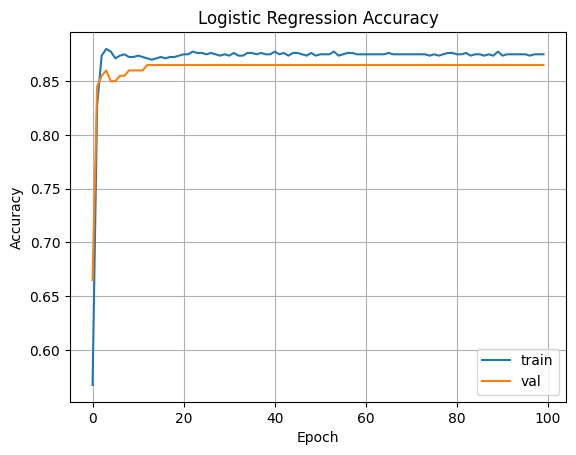

In [5]:
plt.figure()
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title("Logistic Regression Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Plot of the decision boundary:

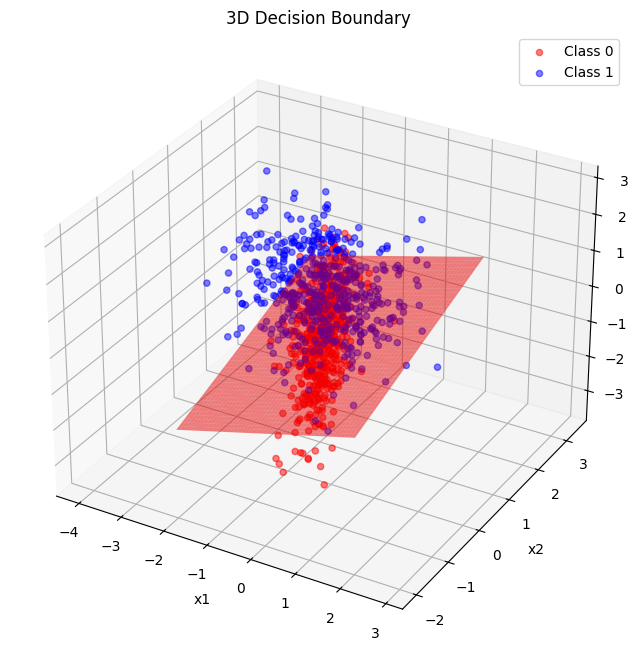

In [8]:
# get weights & bias
weights, bias = model.layers[0].get_weights()
w = weights.flatten()
b = bias[0]

# build meshgrid in x1-x2
x1_range = np.linspace(-2, 2, 50)
x2_range = np.linspace(-2, 2, 50)
X1, X2 = np.meshgrid(x1_range, x2_range)

# compute x3 from the plane equation
if w[2] != 0:
    X3 = (-w[0]*X1 - w[1]*X2 - b) / w[2]
else:
    raise ValueError("w[2] = 0 would make the plane vertical and undefined for x3")

# plot

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c='red', label='Class 0', alpha=0.5)
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c='blue', label='Class 1', alpha=0.5)
ax.plot_surface(X1, X2, X3, alpha=0.5, color='red')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title("3D Decision Boundary")
ax.legend()
plt.show()

## 4. Neural Network on 2D “Moons” + Decision Boundary


## Neural network

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7284 - loss: 0.5480 - val_accuracy: 0.8400 - val_loss: 0.3191
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8521 - loss: 0.3274 - val_accuracy: 0.8550 - val_loss: 0.2770
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8678 - loss: 0.2798 - val_accuracy: 0.8750 - val_loss: 0.2537
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8850 - loss: 0.2474 - val_accuracy: 0.9050 - val_loss: 0.2167
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9145 - loss: 0.2076 - val_accuracy: 0.9350 - val_loss: 0.1681
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9322 - loss: 0.1678 - val_accuracy: 0.9700 - val_loss: 0.1176
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9595 - loss: 0.1298 - val_accuracy: 0.9750 - val_loss: 0.0987
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9623 - loss: 0.1194 - val_accuracy: 0.980

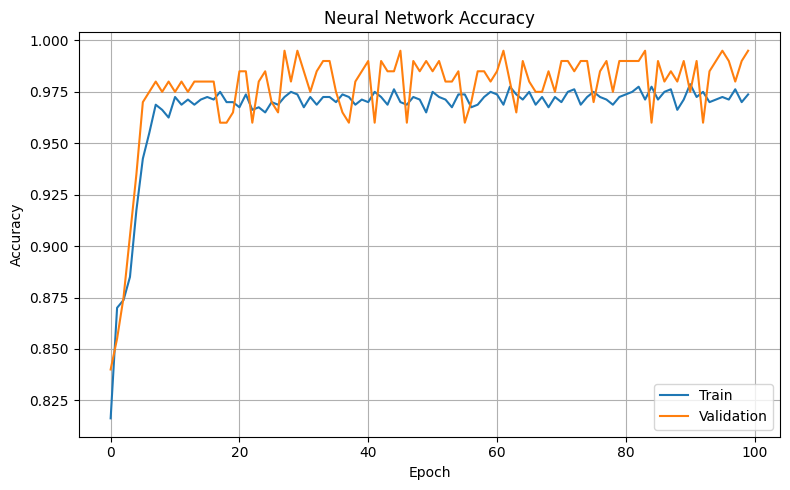

In [10]:
# 1. Generate non-linear binary classification data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# 2. Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define a neural network
model = Sequential([
    Input(shape=(2,)),                # Input layer (2 features)
    Dense(16, activation='relu'),     # Hidden layer 1
    Dense(8, activation='relu'),      # Hidden layer 2
    Dense(1, activation='sigmoid')    # Output layer (binary prob.)
])

# 4. Compile
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=100, verbose=1)

# 6. Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Neural Network Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 945us/step


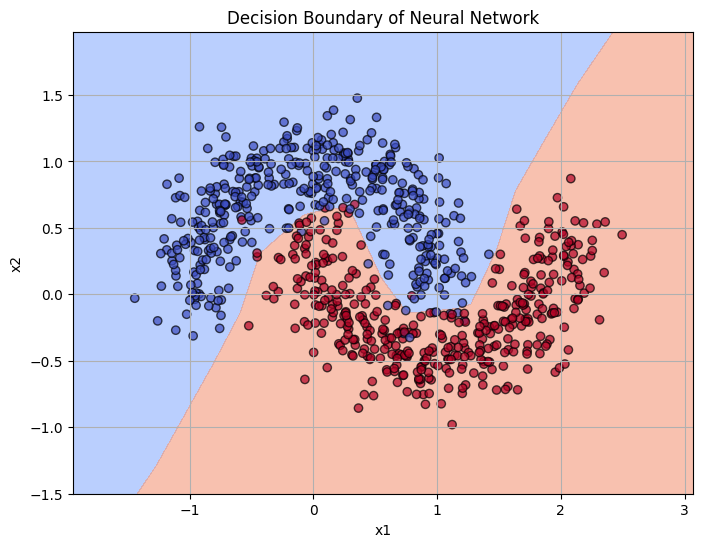

In [11]:
# 1. Create a meshgrid of points over the 2D input space
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                       np.linspace(x2_min, x2_max, 300))

# 2. Stack and scale the grid for prediction
grid = np.c_[xx1.ravel(), xx2.ravel()]
grid_scaled = scaler.transform(grid)
probs = model.predict(grid_scaled).reshape(xx1.shape)

# 3. Plot the contour and the original data
plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], alpha=0.6, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Decision Boundary of Neural Network")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()
